<a href="https://colab.research.google.com/github/101GomJo/Projeto-de-an-lise-da-mortalidade-neonatal-x-nascidos-vivos-2024-/blob/main/limpezadedados_nascXmortNeonatal_br_2024_JoanaGomes(9ago).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
'''
"The 5 W's of Data Science, also known as the 5 W's of Analytics,
are a framework for understanding and approaching data analysis.
These questions are: Who, What, When, Where, and Why"

who?
mulheres gestantes
bebes do sexo masculino (1)
bebes do sexo feminino (2)

what?
avaliar a proporção de mortalidade de recem nascidos nas primeiras 24hs
em coparação aos nascidos vivos da população brasileira
(proporção de natimortos em relação aos vivos)
nascidos vivos x nascidos mortos
Recortes:
1- por estados
2- idade da mãe
3- quantidade de bebe(s) na gestação registrada
4- quantidade de gestação/filhos anteriores por mãe
5- índice de Kotelchuck
6- peso do(s) bebe(s)
when?
2024

where?
Brasil
UF naturalidade

why?
para identificar padrões, tendências ou relações de causalidade:
'''

'\n"The 5 W\'s of Data Science, also known as the 5 W\'s of Analytics,\nare a framework for understanding and approaching data analysis.\nThese questions are: Who, What, When, Where, and Why"\n\nwho?\nmulheres gestantes\nbebes do sexo masculino (1)\nbebes do sexo feminino (2)\n\nwhat?\navaliar a proporção de mortalidade de recem nascidos nas primeiras 24hs\nem coparação aos nascidos vivos da população brasileira\n(proporção de natimortos em relação aos vivos)\nnascidos vivos x nascidos mortos\nRecortes:\n1- por estados\n2- idade da mãe\n3- quantidade de bebe(s) na gestação registrada\n4- quantidade de gestação/filhos anteriores por mãe\n5- índice de Kotelchuck\n6- peso do(s) bebe(s)\nwhen?\n2024\n\nwhere?\nBrasil\nUF naturalidade\n\nwhy?\npara identificar padrões, tendências ou relações de causalidade:\n'

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


##SISTEMA DE INFORMAÇÃO DE MORTALIDADE
##LIMPEZA DE DADOS DO ARQUIVO 'DO24OPEN.csv'

In [ ]:
df_SIM = pd.read_csv("DO24OPEN.csv" , sep=';')
df_SIM.info()

/tmp/ipython-input-3549246895.py:1: DtypeWarning: Columns (65) have mixed types. Specify dtype option on import or set low_memory=False.
  df_SIM = pd.read_csv("DO24OPEN.csv" , sep=';')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426346 entries, 0 to 1426345
Data columns (total 86 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   contador    1426346 non-null  int64  
 1   ORIGEM      1426346 non-null  int64  
 2   TIPOBITO    1426346 non-null  int64  
 3   DTOBITO     1426346 non-null  int64  
 4   HORAOBITO   1378387 non-null  float64
 5   NATURAL     1368617 non-null  float64
 6   CODMUNNATU  1350369 non-null  float64
 7   DTNASC      1424067 non-null  float64
 8   IDADE       1426346 non-null  int64  
 9   SEXO        1426346 non-null  int64  
 10  RACACOR     1406901 non-null  float64
 11  ESTCIV      1366817 non-null  float64
 12  ESC         1346703 non-null  float64
 13  ESC2010     1335121 non-null  float64
 14  SERIESCFAL  419236 non-null   float64
 15  OCUP        1236214 non-null  float64
 16  CODMUNRES   1426346 non-null  int64  
 17  LOCOCOR     1426346 non-null  int64  
 18  CODESTAB    1052082 no

In [ ]:
df_SIM

,contador,ORIGEM,TIPOBITO,DTOBITO,HORAOBITO,NATURAL,CODMUNNATU,DTNASC,IDADE,SEXO,...,TPRESGINFO,TPNIVELINV,DTCADINF,MORTEPARTO,DTCONCASO,ALTCAUSA,CAUSABAS_O,TPPOS,TP_ALTERA,CB_ALT
0,1,1,2,19042024,2301.0,824.0,240490.0,24121964.0,459,1,...,NaN,NaN,NaN,NaN,NaN,NaN,I279,N,NaN,NaN
1,2,1,2,18012024,1030.0,824.0,240940.0,29041958.0,465,2,...,NaN,NaN,NaN,NaN,NaN,NaN,A09,N,NaN,NaN
2,3,1,2,22012024,700.0,824.0,241250.0,23031939.0,484,2,...,NaN,NaN,NaN,NaN,NaN,NaN,E112,N,NaN,NaN
3,4,1,2,24032024,1220.0,824.0,241050.0,10061944.0,479,2,...,NaN,NaN,NaN,NaN,NaN,NaN,G309,N,NaN,NaN
4,5,1,2,12012024,800.0,824.0,240320.0,8031950.0,473,2,...,NaN,NaN,NaN,NaN,NaN,NaN,I219,N,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426341,1426342,1,2,29062024,NaN,821.0,210300.0,24051924.0,500,2,...,NaN,NaN,NaN,NaN,NaN,NaN,R98,S,NaN,NaN
1426342,1426343,1,2,16092024,NaN,821.0,210720.0,8041996.0,428,1,...,NaN,NaN,NaN,NaN,NaN,NaN,X709,NaN,NaN,NaN
1426343,1426344,1,2,17092024,NaN,812.0,120032.0,11071997.0,427,2,...,2.0,E,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1426344,1426345,1,2,26072024,NaN,812.0,120035.0,16072024.0,210,2,...,NaN,NaN,11102024.0,3.0,8102024.0,2.0,NaN,NaN,NaN,NaN


In [ ]:
#seleção de colunas a serem utilizadas na analise
cols = ['TIPOBITO' , 'DTOBITO' , 'DTNASC' , 'IDADE' , 'SEXO' , 'LOCOCOR', 'CODESTAB' ,'CODMUNOCOR'  , 'IDADEMAE' , 'QTDFILVIVO' , 'QTDFILMORT' , 'SEMAGESTAC' , 'GRAVIDEZ' , 'PARTO' , 'OBITOPARTO' , 'PESO' , 'CAUSABAS' ]
df_SIM_cols = pd.read_csv("DO24OPEN.csv", sep=';' , usecols=cols)
df_SIM_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1426346 entries, 0 to 1426345
Data columns (total 17 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   TIPOBITO    1426346 non-null  int64  
 1   DTOBITO     1426346 non-null  int64  
 2   DTNASC      1424067 non-null  float64
 3   IDADE       1426346 non-null  int64  
 4   SEXO        1426346 non-null  int64  
 5   LOCOCOR     1426346 non-null  int64  
 6   CODESTAB    1052082 non-null  float64
 7   CODMUNOCOR  1426346 non-null  int64  
 8   IDADEMAE    25652 non-null    float64
 9   QTDFILVIVO  25550 non-null    float64
 10  QTDFILMORT  24761 non-null    float64
 11  GRAVIDEZ    26222 non-null    float64
 12  SEMAGESTAC  24852 non-null    float64
 13  PARTO       26068 non-null    float64
 14  OBITOPARTO  25783 non-null    float64
 15  PESO        25134 non-null    float64
 16  CAUSABAS    1426346 non-null  object 
dtypes: float64(10), int64(6), object(1)
memory usage: 185.0+ MB


In [ ]:
df_SIM_cols.head(5)

,TIPOBITO,DTOBITO,DTNASC,IDADE,SEXO,LOCOCOR,CODESTAB,CODMUNOCOR,IDADEMAE,QTDFILVIVO,QTDFILMORT,GRAVIDEZ,SEMAGESTAC,PARTO,OBITOPARTO,PESO,CAUSABAS
0,2,19042024,24121964.0,459,1,1,2407582.0,240490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I279
1,2,18012024,29041958.0,465,2,3,NaN,241050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A09
2,2,22012024,23031939.0,484,2,3,NaN,241050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E112
3,2,24032024,10061944.0,479,2,3,NaN,241050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G309
4,2,12012024,8031950.0,473,2,3,NaN,240320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I219


In [ ]:
#função ´para remover o ponto e o zero da data de nascimento (codigo gerado pelo gemini)
def remover_zeros_e_ponto(valor):
  try:
    valor_float = float(valor)
    return str(valor_float).rstrip('0').rstrip('.')
  except ValueError:
    return valor
df_SIM_cols['DTNASC'] = df_SIM_cols['DTNASC'].apply(remover_zeros_e_ponto)

df_SIM_cols.head(2)

,TIPOBITO,DTOBITO,DTNASC,IDADE,SEXO,LOCOCOR,CODESTAB,CODMUNOCOR,IDADEMAE,QTDFILVIVO,QTDFILMORT,GRAVIDEZ,SEMAGESTAC,PARTO,OBITOPARTO,PESO,CAUSABAS
0,2,19042024,24121964,459,1,1,2407582.0,240490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I279
1,2,18012024,29041958,465,2,3,NaN,241050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A09


In [ ]:
#adicionando nova coluna para gerar um ID_obito2024 a partir de um contador
contador = 1
for index, row in df_SIM_cols.iterrows():
    df_SIM_cols.loc[index, 'ID_obito2024'] = contador
    contador += 1

df_SIM_cols

,TIPOBITO,DTOBITO,DTNASC,IDADE,SEXO,LOCOCOR,CODESTAB,CODMUNOCOR,IDADEMAE,QTDFILVIVO,QTDFILMORT,GRAVIDEZ,SEMAGESTAC,PARTO,OBITOPARTO,PESO,CAUSABAS,ID_obito2024
0,2,19042024,24121964,459,1,1,2407582.0,240490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I279,1.0
1,2,18012024,29041958,465,2,3,NaN,241050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A09,2.0
2,2,22012024,23031939,484,2,3,NaN,241050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,E112,3.0
3,2,24032024,10061944,479,2,3,NaN,241050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,G309,4.0
4,2,12012024,8031950,473,2,3,NaN,240320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I219,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1426341,2,29062024,24051924,500,2,3,NaN,210515,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,R98,1426342.0
1426342,2,16092024,8041996,428,1,3,NaN,210720,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X709,1426343.0
1426343,2,17092024,11071997,427,2,9,NaN,120032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,X709,1426344.0
1426344,2,26072024,16072024,210,2,6,NaN,120035,25.0,0.0,0.0,1.0,NaN,1.0,3.0,2900.0,A09,1426345.0


In [ ]:
df_SIM_cols.to_csv('SIM_cols.csv' , index=False , sep= ';')

In [ ]:
'''1- Tipo do óbito TIPOBITO Caracter 1 1-Fetal; 2-Não Fetal
Tipo do óbito
Óbito fetal: morte antes da expulsão ou da
extração completa do corpo da Mãe,
independentemente da duração da gravidez.
Indica o óbito o fato de o feto, depois da
expulsão do corpo materno, não respirar nem
apresentar nenhum outro sinal de vida, como
batimentos do coração, pulsações do cordão
umbilical ou movimentos efetivos dos
músculos de contração voluntária'''

df_MORT_FETAL = df_SIM_cols.loc[(df_SIM_cols['TIPOBITO'] ==1)]
df_MORT_FETAL
#NÃO HÁ REGISTRO DE MORTE FETAL, CONTUDO ISSO PODE APENAS SIGNIFICAR QUE AS MORTES FETAIS NÃO SÃO DEVIDADEMNTE REGISTRADAS

,TIPOBITO,DTOBITO,DTNASC,IDADE,SEXO,LOCOCOR,CODESTAB,CODMUNOCOR,IDADEMAE,QTDFILVIVO,QTDFILMORT,GRAVIDEZ,SEMAGESTAC,PARTO,OBITOPARTO,PESO,CAUSABAS,ID_obito2024


In [ ]:
'''[INFORMAÇÃO DO DICIONÁRIO DO SIM]
Idade: composto de dois subcampos.
- O primeiro, de 1 dígito, indica a unidade da idade (se 1 = minuto,
se 2 = hora, se 3 = mês, se 4 = ano, se = 5 idade maior que 100 anos).
- O segundo, de dois dígitos, indica a quantidade de unidades:
Idade menor de 1 hora: subcampo varia de 01 e 59 (minutos); De 1
a 23 Horas: subcampo varia de 01 a 23 (horas); De 24 horas e 29
dias: subcampo varia de 01 a 29 (dias); De 1 a menos de 12 meses
completos: subcampo varia de 01 a 11 (meses); Anos - subcampo
varia de 00 a 99;
- 9 - ignorado'''

'''Morte neonatal é definida como o óbito de um recém-nascido durante os primeiros 28 dias de vida. É um indicador importante da saúde materno-infantil, refletindo fatores como as condições socioeconômicas, a qualidade da assistência pré-natal e do parto, e a saúde da mãe e do bebê.
A mortalidade neonatal pode ser dividida em:
Morte neonatal precoce: Ocorre nos primeiros 7 dias de vida.
Morte neonatal tardia: Ocorre entre 7 e 27 dias de vida.
Causas comuns de morte neonatal incluem: Asfixia intrauterina e intraparto, Baixo peso ao nascer, Problemas respiratórios, Infecções, Prematuridade.
A prevenção da mortalidade neonatal envolve:
Melhoria da assistência pré-natal e do parto.
Atenção à saúde da mãe e do bebê durante a gravidez e após o nascimento.
Intervenções para reduzir fatores de risco, como baixo peso ao nascer e prematuridade.(IN: pesquisa google) '''

#SELECIONANDO APENAS DADOS DE MORTALIDADE NEONATAL (FALECIMENTO ENTRE 1 MINUTO ATÉ O 27 DIA DE VIDA)
df_MortNeonatal = df_SIM_cols.loc[(df_SIM_cols['IDADE'] > 100) & (df_SIM_cols['IDADE'] < 328)].reset_index()
df_MortNeonatal


,index,TIPOBITO,DTOBITO,DTNASC,IDADE,SEXO,LOCOCOR,CODESTAB,CODMUNOCOR,IDADEMAE,QTDFILVIVO,QTDFILMORT,GRAVIDEZ,SEMAGESTAC,PARTO,OBITOPARTO,PESO,CAUSABAS,ID_obito2024
0,38,2,15012024,10012024,205,1,1,2654261.0,240810,23.0,0.0,0.0,1.0,39.0,2.0,3.0,4046.0,P219,39.0
1,48,2,21072024,24012024,305,1,1,2665778.0,240200,21.0,2.0,0.0,1.0,40.0,1.0,9.0,3250.0,J159,49.0
2,167,2,1072024,30062024,201,2,1,2237571.0,431490,21.0,2.0,1.0,1.0,37.0,1.0,3.0,3155.0,P000,168.0
3,168,2,1072024,1072024,101,1,1,2237571.0,431490,32.0,NaN,NaN,2.0,23.0,2.0,3.0,800.0,P015,169.0
4,169,2,11072024,15062024,226,1,1,2237571.0,431490,24.0,0.0,0.0,1.0,30.0,2.0,3.0,1790.0,P569,170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25896,1426178,2,6112024,4112024,202,1,1,10499.0,530010,21.0,2.0,1.0,2.0,24.0,1.0,3.0,630.0,P209,1426179.0
25897,1426186,2,11112024,11112024,112,1,1,10499.0,530010,29.0,7.0,0.0,1.0,32.0,2.0,3.0,2130.0,P002,1426187.0
25898,1426204,2,25112024,23112024,202,1,1,10480.0,530010,25.0,4.0,0.0,1.0,28.0,1.0,NaN,1140.0,P228,1426205.0
25899,1426264,2,17112024,7072024,304,1,1,3030121.0,530010,19.0,1.0,NaN,1.0,24.0,2.0,3.0,730.0,J159,1426265.0


In [ ]:
#CRIANDO UM NOVO CSV REFERENTE A MORTALIDADE NEONATAL: FALECIDOS NOS PRIMEIROS 27 DIAS DE VIDA
df_MortNeonatal.to_csv('MortNeonatal_SIM.csv' , index=False , sep= ';')


In [ ]:
total_obitos_sim = len(df_SIM_cols)
total_obitos_neonatal_sim = len(df_MortNeonatal)
proporcao_obitos_neonatal_sim = total_obitos_neonatal_sim * 100/ total_obitos_sim
print(f"Total de óbitos em 2024: {total_obitos_sim:.2f}\nTotal de óbitos Neonatal em 2024: {total_obitos_neonatal_sim:.2f}\nProporção de óbitos Neonatal em relação ao total de óbitos: {proporcao_obitos_neonatal_sim:.2f}%")

Total de óbitos em 2024: 1426346.00
Total de óbitos Neonatal em 2024: 25901.00
Proporção de óbitos Neonatal em relação ao total de óbitos: 1.82%


In [ ]:
#limpeza dos valoes NaN das colunas 'IDADEMAE' E 'SEMAGESTAC' PARA CRIAÇÃO DE ARRAYS E CÁLCULOS POSTERIORES
#df_cleaned = df.dropna()
df_MortNeonatal = df_MortNeonatal.dropna(subset=['IDADEMAE'])
df_MortNeonatal = df_MortNeonatal.dropna(subset=['SEMAGESTAC'])
df_MortNeonatal = df_MortNeonatal.dropna(subset=['IDADE'])
df_MortNeonatal

,index,TIPOBITO,DTOBITO,DTNASC,IDADE,SEXO,LOCOCOR,CODESTAB,CODMUNOCOR,IDADEMAE,QTDFILVIVO,QTDFILMORT,GRAVIDEZ,SEMAGESTAC,PARTO,OBITOPARTO,PESO,CAUSABAS,ID_obito2024
0,38,2,15012024,10012024,205,1,1,2654261.0,240810,23.0,0.0,0.0,1.0,39.0,2.0,3.0,4046.0,P219,39.0
1,48,2,21072024,24012024,305,1,1,2665778.0,240200,21.0,2.0,0.0,1.0,40.0,1.0,9.0,3250.0,J159,49.0
2,167,2,1072024,30062024,201,2,1,2237571.0,431490,21.0,2.0,1.0,1.0,37.0,1.0,3.0,3155.0,P000,168.0
3,168,2,1072024,1072024,101,1,1,2237571.0,431490,32.0,NaN,NaN,2.0,23.0,2.0,3.0,800.0,P015,169.0
4,169,2,11072024,15062024,226,1,1,2237571.0,431490,24.0,0.0,0.0,1.0,30.0,2.0,3.0,1790.0,P569,170.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25895,1426159,2,19112024,10092024,302,1,1,3030121.0,530010,40.0,2.0,0.0,1.0,31.0,2.0,3.0,1285.0,I270,1426160.0
25896,1426178,2,6112024,4112024,202,1,1,10499.0,530010,21.0,2.0,1.0,2.0,24.0,1.0,3.0,630.0,P209,1426179.0
25897,1426186,2,11112024,11112024,112,1,1,10499.0,530010,29.0,7.0,0.0,1.0,32.0,2.0,3.0,2130.0,P002,1426187.0
25898,1426204,2,25112024,23112024,202,1,1,10480.0,530010,25.0,4.0,0.0,1.0,28.0,1.0,NaN,1140.0,P228,1426205.0


In [ ]:
#limpeza dos valores errados para semana de gestação (parêmetro: acima de 50 semanas pode ser considerado um dado equivocado)
#limpeza dos valores errados para idade da mãe (parêmetro: segundo o google a mulher de maior idade a ter filhos tinha 73 anos)
df_MNN_loc_idademae = df_MortNeonatal.loc[(df_MortNeonatal['IDADEMAE'] < 80)]
df_MNN_loc_semagestac = df_MortNeonatal.loc[(df_MortNeonatal['SEMAGESTAC'] < 50)]



In [ ]:
#criação de arrays para IDADE DO RECÉM NASCIDO NO ÓBITO, idade da mãe e semanas de gestação

df_MNN_idademae_array = np.array(df_MNN_loc_idademae['IDADEMAE'])
df_MNN_semagestac_array = np.array(df_MNN_loc_semagestac['SEMAGESTAC'])
df_MNN_idadeRN_array = np.array(df_MortNeonatal['IDADE'])
print(len(df_MNN_idademae_array))
print(len(df_MNN_semagestac_array))
print(len(df_MNN_idadeRN_array))

22025
21699
22047


In [ ]:
#calculos média, mediana e distancia

#media
media_idademae = np.mean(df_MNN_idademae_array)
media_semagestac = np.mean(df_MNN_semagestac_array)
media_idadeRN = np.mean(df_MNN_idadeRN_array)

# mediana
mediana_idademae = np.median(df_MNN_idademae_array)
mediana_semagestac = np.median(df_MNN_semagestac_array)
mediana_idadeRN = np.median(df_MNN_idadeRN_array)

#distancia
dist_idademae = (media_idademae - mediana_idademae) / mediana_idademae
dist_semagestac = (media_semagestac - mediana_semagestac) / mediana_semagestac
dist_idadeRN = (media_idadeRN - mediana_idadeRN) / mediana_idadeRN

print(f"Média da idade da mãe: {media_idademae:.2f}\nMediana da idade da mãe: {mediana_idademae:.2f}\nDistância da idade da mãe: {dist_idademae:.2f}\n\n")
print(f"Média da semana de gestação: {media_semagestac:.2f}\nMediana da semana de gestação: {mediana_semagestac:.2f}\nDistância da semana de gestação: {dist_semagestac:.2f}\n\n")
print(f"Média da idade do RN no óbito: {media_idadeRN:.2f}\nMediana da idade do RN no óbito: {mediana_idadeRN:.2f}\nDistância da idade do RN no óbito: {dist_idadeRN:.2f}")

Média da idade da mãe: 27.73
Mediana da idade da mãe: 27.00
Distância da idade da mãe: 0.03


Média da semana de gestação: 31.16
Mediana da semana de gestação: 32.00
Distância da semana de gestação: -0.03


Média da idade do RN no óbito: 219.88
Mediana da idade do RN no óbito: 207.00
Distância da idade do RN no óbito: 0.06


In [ ]:
# quartis boxplot idade da mãe
q1_MNN_idademae = np.percentile(df_MNN_idademae_array , 25)
q2_MNN_idademae = np.percentile(df_MNN_idademae_array , 50)
q3_MNN_idademae = np.percentile(df_MNN_idademae_array , 75)
iqr_MNN_idademae = q3_MNN_idademae - q1_MNN_idademae
LimSup_MNN_idademae = q3_MNN_idademae + (1.5 * iqr_MNN_idademae)
LimInf_MNN_idademae = q1_MNN_idademae - (1.5 * iqr_MNN_idademae)

print(f"Q1 = {q1_MNN_idademae}\nQ2 = {q2_MNN_idademae}\nQ3 = {q3_MNN_idademae}\nIQR = {iqr_MNN_idademae}\nLimite Superior = {LimSup_MNN_idademae}\nLimite Inferior = {LimInf_MNN_idademae}")



Q1 = 22.0
Q2 = 27.0
Q3 = 33.0
IQR = 11.0
Limite Superior = 49.5
Limite Inferior = 5.5


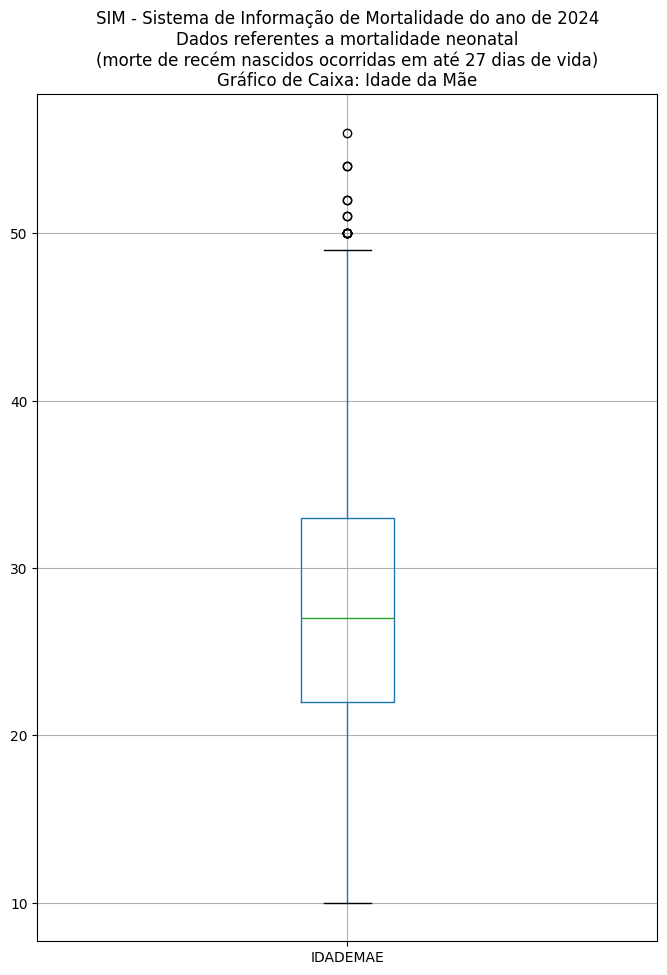

In [ ]:
plt.figure(figsize=(8, 11))  # (Largura, Altura em polegadas)
df_MNN_loc_idademae.boxplot(column='IDADEMAE')
plt.title(f"SIM - Sistema de Informação de Mortalidade do ano de 2024\nDados referentes a mortalidade neonatal\n(morte de recém nascidos ocorridas em até 27 dias de vida)\nGráfico de Caixa: Idade da Mãe")
plt.show()

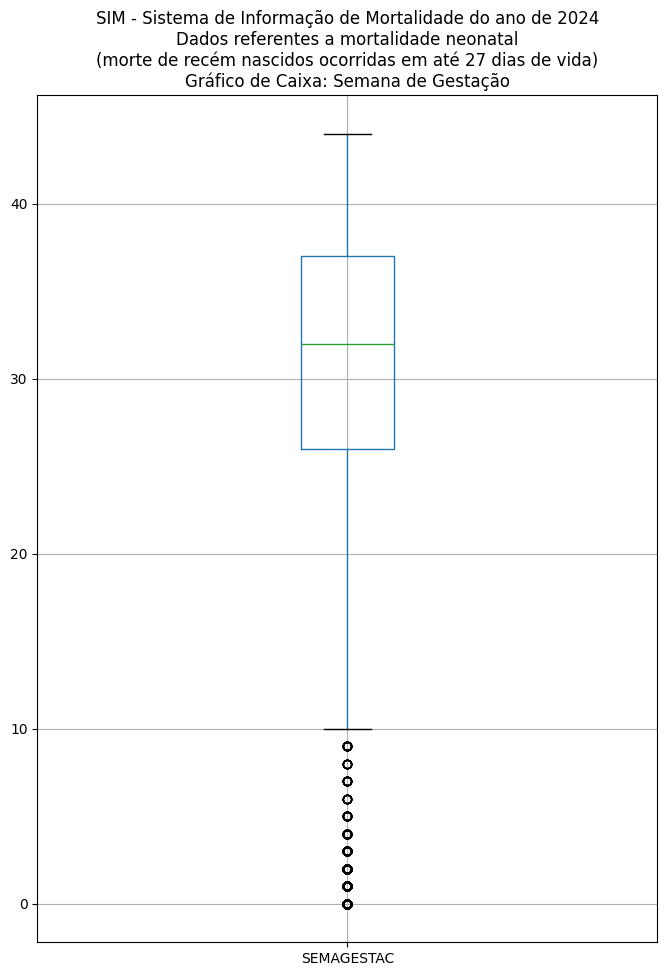

In [ ]:
plt.figure(figsize=(8, 11))  # (Largura, Altura em polegadas)
df_MNN_loc_semagestac.boxplot(column='SEMAGESTAC')
plt.title("SIM - Sistema de Informação de Mortalidade do ano de 2024\nDados referentes a mortalidade neonatal\n(morte de recém nascidos ocorridas em até 27 dias de vida)\nGráfico de Caixa: Semana de Gestação")
plt.show()

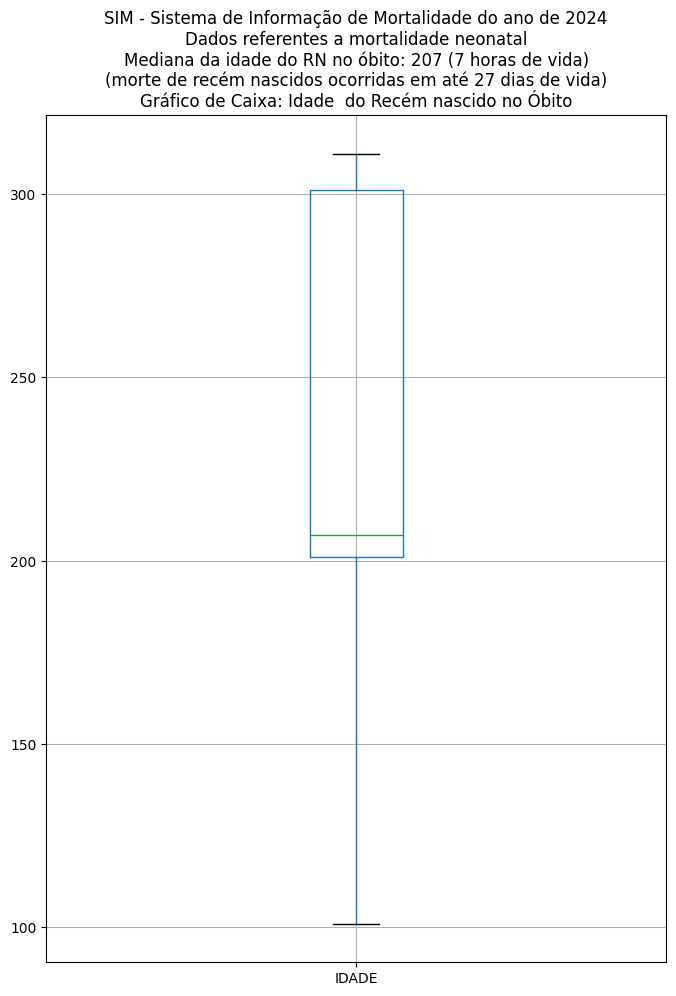

In [ ]:
df_MNN_idadeRN_array

plt.figure(figsize=(8, 11))  # (Largura, Altura em polegadas)
df_MortNeonatal.boxplot(column='IDADE')
plt.title(f"SIM - Sistema de Informação de Mortalidade do ano de 2024\nDados referentes a mortalidade neonatal\nMediana da idade do RN no óbito: {mediana_idadeRN:.0f} (7 horas de vida)\n(morte de recém nascidos ocorridas em até 27 dias de vida)\nGráfico de Caixa: Idade  do Recém nascido no Óbito")
plt.show()

In [ ]:
#calculo da média de idade da mãe
df_MNN_idade_idademae = df_MNN_loc_idademae.groupby(['IDADE'])['IDADEMAE'].mean().round(1).reset_index()
df_MNN_idade_idademae = df_MNN_idade_idademae.sort_values(by = 'IDADEMAE')
df_MNN_idade_idademae

,IDADE,IDADEMAE
18,119,24.7
21,122,25.3
5,106,26.1
14,115,26.1
10,111,26.3
...,...,...
13,114,28.8
41,218,28.9
38,215,29.2
44,221,29.2


In [ ]:
#calculo da média de semanas de gestação
df_MNN_idade_semagestac = df_MNN_loc_semagestac.groupby(['IDADE'])['SEMAGESTAC'].mean().round(1).reset_index()
df_MNN_idade_semagestac = df_MNN_idade_semagestac.sort_values(by = 'SEMAGESTAC')
df_MNN_idade_semagestac


,IDADE,SEMAGESTAC
0,101,26.9
23,200,27.0
1,102,27.4
19,120,27.7
2,103,27.9
...,...,...
62,310,34.3
63,311,34.3
57,305,34.7
58,306,34.8


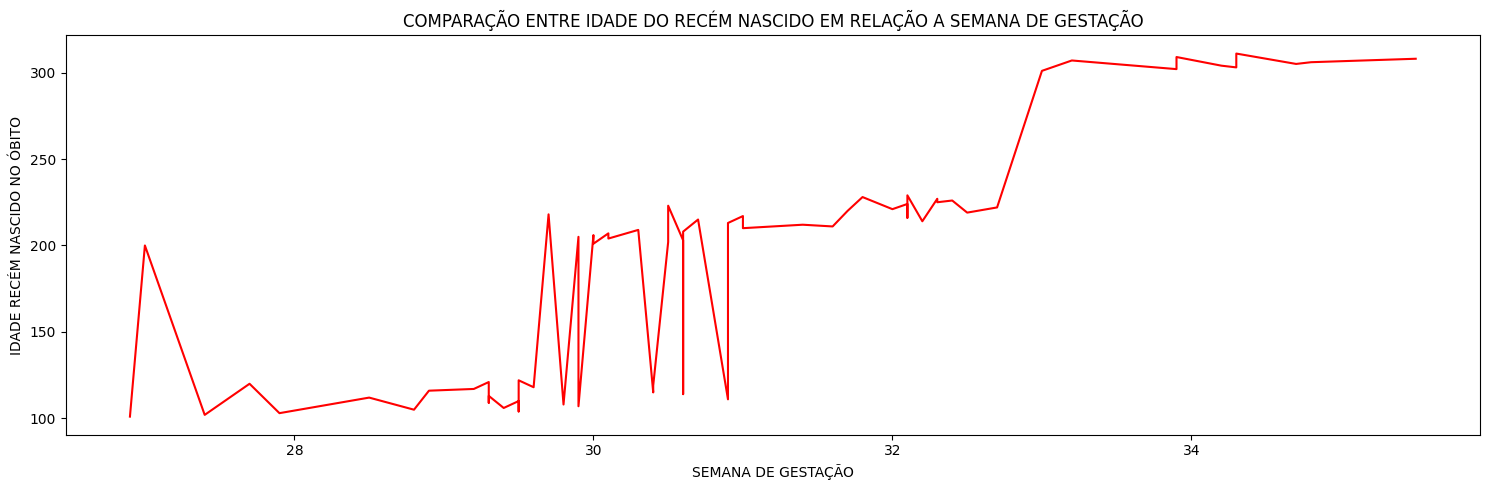

In [ ]:
#GRÁFICO DE COMPARAÇÃO ENTRE IDADE DO RECÉM NASCIDO EM RELAÇÃO A SEMANA DE GESTAÇÃO
#OBS.: a idade do recém nascido no óbito está codificada: o primeiro digito diz respeito ao tipo de valor dos dois digitos seguintes
#os valores que começam com dígito 1 dizem respeito a mortes nos minutos até a 59 minutos
#os valores que começam com dígito 2 dizem respeito a mortes nas primeiras horas até a 23:59
#os valores que começam com dígito 3 dizem respeito a mortes entre o 1 dia e o 27º dia de vida
plt.figure(figsize=(15,5))
#plt.plot(df_MortNeonatal['IDADE'], df_MortNeonatal['IDADEMAE'], marker='o', linestyle='-', color="blue")
plt.plot(df_MNN_idade_semagestac['SEMAGESTAC'], df_MNN_idade_semagestac['IDADE'], linestyle='-', color="red")
plt.title('COMPARAÇÃO ENTRE IDADE DO RECÉM NASCIDO EM RELAÇÃO A SEMANA DE GESTAÇÃO')
plt.xlabel('SEMANA DE GESTAÇÃO')
plt.ylabel('IDADE RECÉM NASCIDO NO ÓBITO')
plt.tight_layout()
plt.show()


<Figure size 1600x800 with 0 Axes>

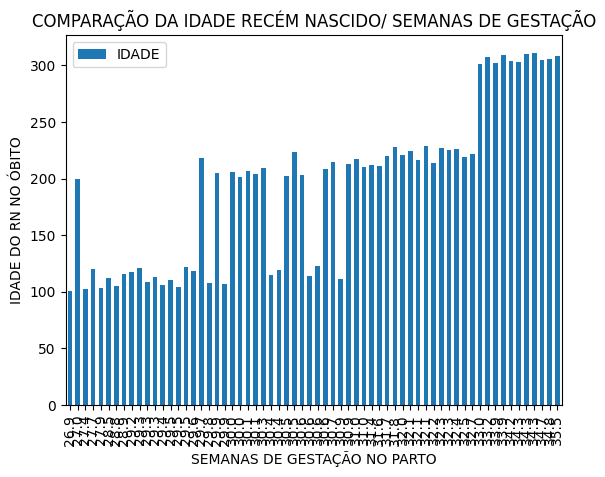

In [ ]:
plt.figure(figsize=(16,8))
df_MNN_idade_semagestac.plot(kind='bar' , x= 'SEMAGESTAC', y= 'IDADE',  width=0.6)
plt.xlabel('SEMANAS DE GESTAÇÃO NO PARTO')
plt.ylabel('IDADE DO RN NO ÓBITO')
plt.title('COMPARAÇÃO DA IDADE RECÉM NASCIDO/ SEMANAS DE GESTAÇÃO')
plt.show()

In [ ]:
#função para traduzir a idade do RN
def idade_RN(valor):
    try:
        if valor > 100 and valor < 160:
            idademin = valor - 100
            idademin = str(idademin)
            imin = idademin + 'minuto(s)'
            return imin
        elif valor > 200 and valor < 260:
            idadehora = valor - 200
            idadehora = str(idadehora)
            ihora = idadehora + 'hora(s)'
            return ihora
        elif valor > 300 and valor < 328:
            idadedias = valor - 300
            idadedias = str(idadedias)
            idias = idadedias + 'dia(s)'
            return idias
        else:
            return valor
    except ValueError:
        return valor

df_SIM_cols['IDADE'] = df_SIM_cols['IDADE'].apply(idade_RN)

df_SIM_cols.head(2)

,TIPOBITO,DTOBITO,DTNASC,IDADE,SEXO,LOCOCOR,CODESTAB,CODMUNOCOR,IDADEMAE,QTDFILVIVO,QTDFILMORT,GRAVIDEZ,SEMAGESTAC,PARTO,OBITOPARTO,PESO,CAUSABAS,ID_obito2024
0,2,19042024,24121964,459,1,1,2407582.0,240490,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,I279,1.0
1,2,18012024,29041958,465,2,3,NaN,241050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,A09,2.0


##SISTEMA DE INFORMAÇÃO DE NASCIDOS VIVOS - SINASC
#LIMPEZA DE DADOS DO ARQUIVO 'SINASC_2024.csv'

In [ ]:
#lEITURA DO ARQUIVO "SINASC_2024.csv"

df_SINASC = pd.read_csv("SINASC_2024.csv" , sep=';')
df_SINASC.info()

/tmp/ipython-input-3739305800.py:3: DtypeWarning: Columns (34) have mixed types. Specify dtype option on import or set low_memory=False.
  df_SINASC = pd.read_csv("SINASC_2024.csv" , sep=';')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260034 entries, 0 to 2260033
Data columns (total 62 columns):
 #   Column      Dtype  
---  ------      -----  
 0   contador    int64  
 1   ORIGEM      int64  
 2   CODESTAB    float64
 3   CODMUNNASC  int64  
 4   LOCNASC     int64  
 5   IDADEMAE    float64
 6   ESTCIVMAE   float64
 7   ESCMAE      float64
 8   CODOCUPMAE  float64
 9   QTDFILVIVO  float64
 10  QTDFILMORT  float64
 11  CODMUNRES   int64  
 12  GESTACAO    float64
 13  GRAVIDEZ    float64
 14  PARTO       float64
 15  CONSULTAS   float64
 16  DTNASC      int64  
 17  HORANASC    float64
 18  SEXO        int64  
 19  APGAR1      float64
 20  APGAR5      float64
 21  RACACOR     float64
 22  PESO        float64
 23  IDANOMAL    float64
 24  DTCADASTRO  int64  
 25  CODANOMAL   object 
 26  NUMEROLOTE  float64
 27  VERSAOSIST  object 
 28  DTRECEBIM   float64
 29  DIFDATA     int64  
 30  OPORT_DN    int64  
 31  DTRECORIGA  int64  
 32  NATURALMAE  float64
 33  CODMUNN

In [ ]:
df_SINASC


,contador,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,...,TPFUNCRESP,TPDOCRESP,DTDECLARAC,ESCMAEAGR1,STDNEPIDEM,STDNNOVA,CODPAISRES,TPROBSON,PARIDADE,KOTELCHUCK
0,1,1,2516500.0,110001,1,24.0,1.0,3.0,999992.0,1.0,...,2.0,3.0,14022024.0,3.0,0.0,1,1.0,5,1,2
1,2,1,2516500.0,110001,1,29.0,2.0,5.0,999992.0,0.0,...,2.0,3.0,17042024.0,8.0,0.0,1,1.0,2,0,2
2,3,1,2516500.0,110001,1,30.0,5.0,4.0,622020.0,2.0,...,2.0,3.0,29052024.0,5.0,0.0,1,1.0,5,1,5
3,4,1,2516500.0,110001,1,14.0,5.0,4.0,999991.0,0.0,...,2.0,3.0,27052024.0,4.0,0.0,1,1.0,1,0,5
4,5,1,2516500.0,110001,1,24.0,2.0,4.0,999992.0,1.0,...,2.0,3.0,13052024.0,5.0,0.0,1,1.0,5,1,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2260029,2260030,1,10480.0,530010,1,26.0,2.0,4.0,999992.0,1.0,...,2.0,4.0,26112024.0,6.0,1.0,1,1.0,3,1,2
2260030,2260031,1,10480.0,530010,1,20.0,1.0,4.0,513435.0,0.0,...,2.0,4.0,26112024.0,6.0,1.0,1,1.0,1,0,2
2260031,2260032,1,10480.0,530010,1,25.0,1.0,3.0,999992.0,1.0,...,2.0,4.0,26112024.0,3.0,1.0,1,1.0,5,1,2
2260032,2260033,1,10480.0,530010,1,31.0,2.0,5.0,999992.0,1.0,...,2.0,4.0,26112024.0,7.0,1.0,1,1.0,3,1,2


In [ ]:
#SELEÇÃO DE COLUNAS A SEREM UTILIZADAS PARA ANÁLISE
cols_SINASC = ['LOCNASC' ,'CODMUNNASC','IDADEMAE','QTDFILVIVO','QTDFILMORT','GESTACAO','GRAVIDEZ','PARTO',
               'CONSULTAS','DTNASC','SEXO','APGAR1','APGAR5','PESO','CODANOMAL',
               'HORANASC','IDANOMAL','CODESTAB','RACACORMAE','QTDGESTANT',
               'QTDPARTNOR','QTDPARTCES','SEMAGESTAC','CONSPRENAT','MESPRENAT','TPAPRESENT',
               'STTRABPART','STCESPARTO','KOTELCHUCK']

df_SINASC_cols = pd.read_csv("SINASC_2024.csv", sep=';' , usecols=cols_SINASC)
df_SINASC_cols.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2260034 entries, 0 to 2260033
Data columns (total 29 columns):
 #   Column      Dtype  
---  ------      -----  
 0   CODESTAB    float64
 1   CODMUNNASC  int64  
 2   LOCNASC     int64  
 3   IDADEMAE    float64
 4   QTDFILVIVO  float64
 5   QTDFILMORT  float64
 6   GESTACAO    float64
 7   GRAVIDEZ    float64
 8   PARTO       float64
 9   CONSULTAS   float64
 10  DTNASC      int64  
 11  HORANASC    float64
 12  SEXO        int64  
 13  APGAR1      float64
 14  APGAR5      float64
 15  PESO        float64
 16  IDANOMAL    float64
 17  CODANOMAL   object 
 18  RACACORMAE  float64
 19  QTDGESTANT  float64
 20  QTDPARTNOR  float64
 21  QTDPARTCES  float64
 22  SEMAGESTAC  float64
 23  CONSPRENAT  float64
 24  MESPRENAT   float64
 25  TPAPRESENT  float64
 26  STTRABPART  float64
 27  STCESPARTO  float64
 28  KOTELCHUCK  int64  
dtypes: float64(23), int64(5), object(1)
memory usage: 500.0+ MB


In [ ]:
df_SINASC_cols['DTNASC'] = df_SINASC_cols['DTNASC'].apply(remover_zeros_e_ponto)

In [ ]:
#adicionando nova coluna para gerar um ID_nasc2024 a partir de um contador

contador = 1
for index, row in df_SINASC_cols.iterrows():
    df_SINASC_cols.loc[index, 'ID_nasc2024'] = contador
    contador += 1
df_SINASC_cols


In [ ]:
#CRIANDO UM NOVO CSV COM REDUÇÃO DE COLUNAS DO ARQUIVO SINASC
df_SINASC_cols.to_csv('SINASC_cols.csv' , index=False , sep= ';')
